<a href="https://colab.research.google.com/github/cs-iuu/word-sense-2025-fall-ai/blob/main/10.1.embeddings_sentence_level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tokenization & Embeddings

This notebook demonstrates how tokenization and embeddings work at the sentence level.

Two approaches are shown: Word2Vec and Context Embedding.

## Install libraries

In [ ]:
# !pip install sentencepiece transformers datasets umap-learn matplotlib
!pip install gensim sentence-transformers scikit-learn matplotlib seaborn


In [ ]:
from gensim.models import Word2Vec
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## BPE Tokenization Example with SentencePiece

Demonstrates BPE (Byte-Pair Encoding) tokenization with SentencePiece using Mongolian sentences.

In [ ]:
import sentencepiece as spm

# Train a small BPE model on sample Mongolian text
with open("mongolian_sample.txt", "w") as f:
    f.write("Би чамд хайртай. Бид бүгдээрээ сурагчид.\n")

spm.SentencePieceTrainer.train(
    input="mongolian_sample.txt",
    model_prefix="mn_bpe",
    vocab_size=25
)

sp = spm.SentencePieceProcessor(model_file="mn_bpe.model")
print(sp.encode("Би чамд хайртай.", out_type=str))


['▁Би', '▁', 'ч', 'а', 'м', 'д', '▁', 'х', 'ай', 'р', 'т', 'ай', '.']


## Comparison of Wor2Vec and Context Embeddings

### Load sentences

In [ ]:
sentences = [
    "Би сургуульд явж байна",       # I am going to school
    "Сурагч сургуульд суралцдаг",   # A student studies at school
    "Багш хичээл заадаг",           # The teacher teaches lessons
    "Ном унших нь сонирхолтой",     # Reading books is interesting
    "Би номын санд байна"           # I am in the library
]


### Word2Vec Embeddings

In [ ]:
tokenized = [s.split() for s in sentences]

w2v_model = Word2Vec(tokenized, vector_size=50, window=2, min_count=1, sg=1)

def sentence_vector(sentence):
    words = sentence.split()
    vectors = [w2v_model.wv[w] for w in words if w in w2v_model.wv]
    return np.mean(vectors, axis=0)

w2v_embeddings = np.array([sentence_vector(s) for s in sentences])


### Context Embeddings:  MiniLM

In [ ]:
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
minilm_embeddings = model.encode(sentences)


### Compare similarity


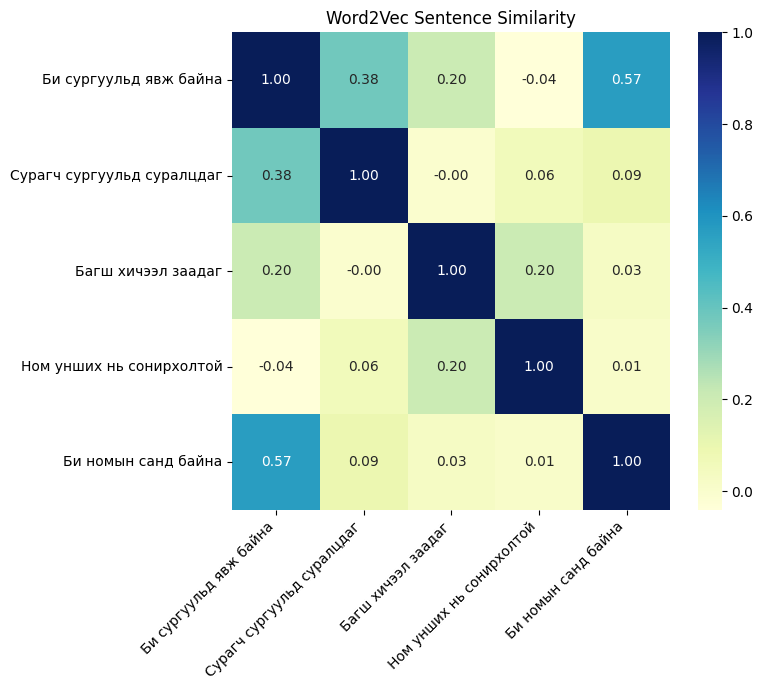

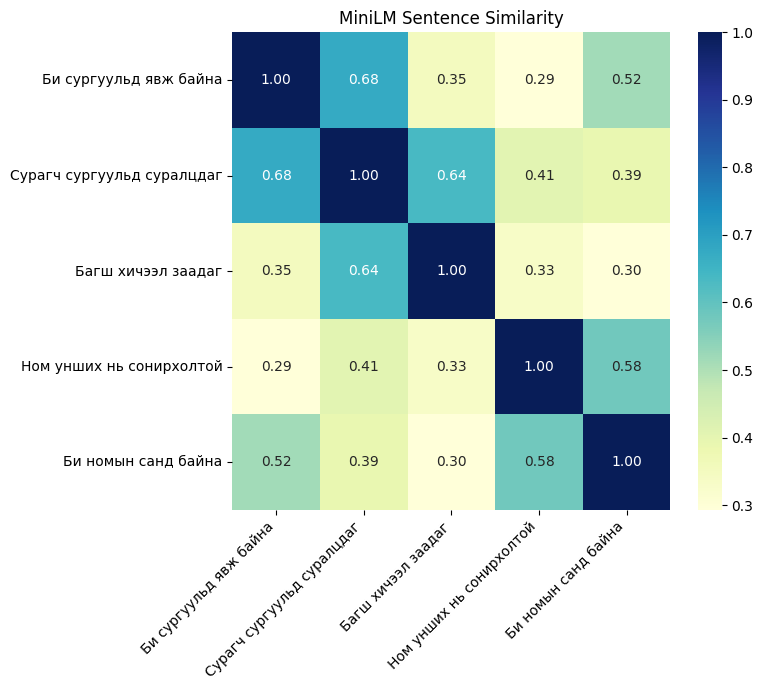

In [ ]:
def plot_similarity(embeddings, title):
    sim = cosine_similarity(embeddings)
    plt.figure(figsize=(8,7)) # Increased figure size for longer labels
    sns.heatmap(sim, annot=True, xticklabels=sentences, # Use sentences here
                yticklabels=sentences, cmap="YlGnBu", fmt=".2f") # Use sentences here
    plt.title(title)
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
    plt.yticks(rotation=0)
    plt.tight_layout() # Adjust layout to prevent labels from being cut off
    plt.show()

plot_similarity(w2v_embeddings, "Word2Vec Sentence Similarity")
plot_similarity(minilm_embeddings, "MiniLM Sentence Similarity")

### Visualize (t-SNE)

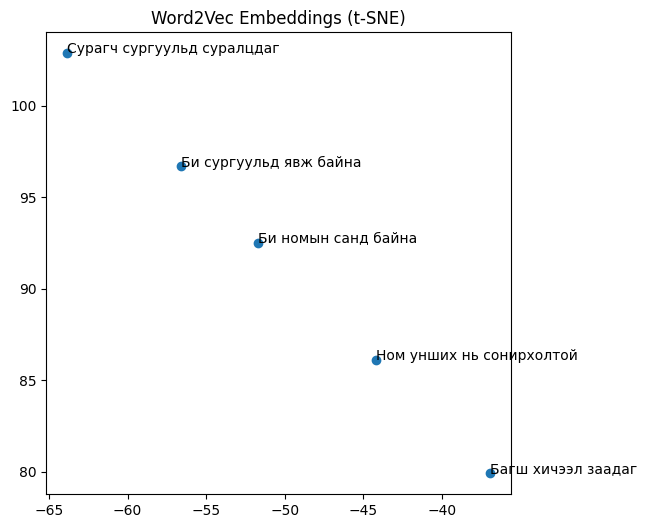

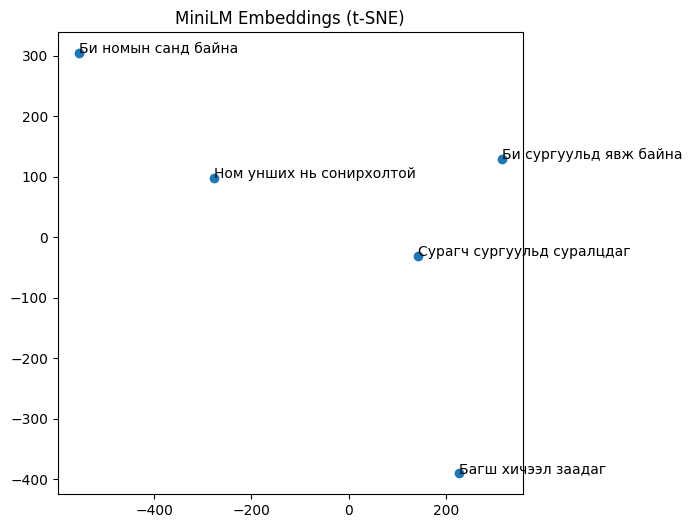

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize_tsne(embeddings, title):
    reduced = TSNE(n_components=2, perplexity=1).fit_transform(embeddings)
    plt.figure(figsize=(6,6))
    plt.scatter(reduced[:,0], reduced[:,1])
# reduced = TSNE(n_components=2, perplexity=1).fit_transform(embeddings)
# plt.scatter(reduced[:,0], reduced[:,1])
    for i, txt in enumerate(sentences):
        plt.annotate(txt, (reduced[i,0], reduced[i,1]))
    plt.title(title)
    plt.show()

visualize_tsne(w2v_embeddings, "Word2Vec Embeddings (t-SNE)")
visualize_tsne(minilm_embeddings, "MiniLM Embeddings (t-SNE)")

### Visualize (PCA)

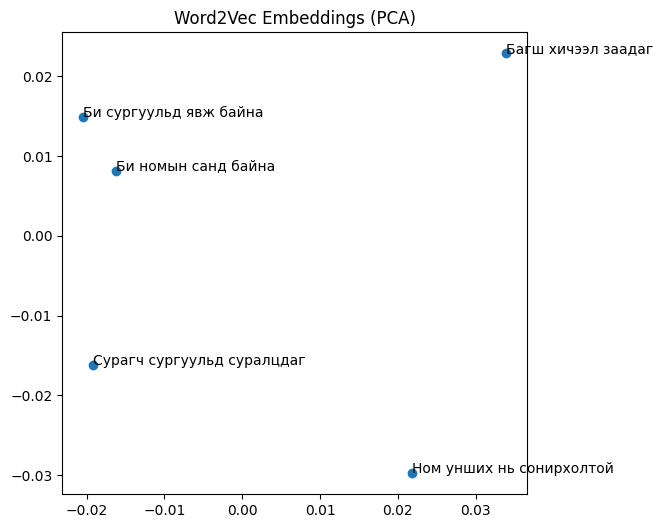

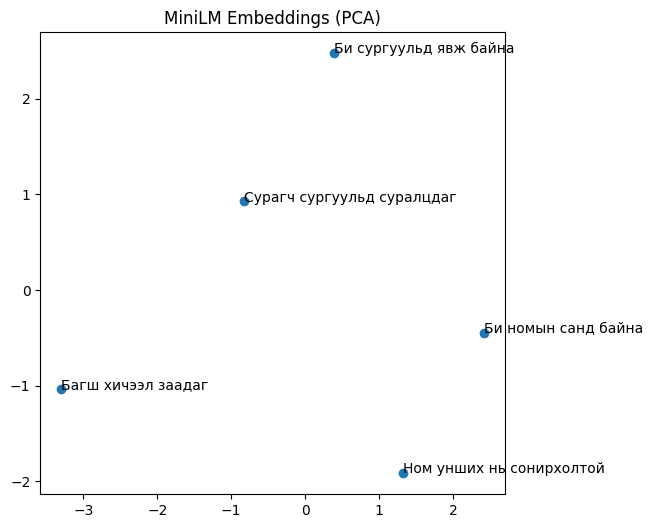

In [ ]:
def visualize_pca(embeddings, title):
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(embeddings)
    plt.figure(figsize=(6,6))
    plt.scatter(reduced[:,0], reduced[:,1])
    for i, txt in enumerate(sentences):  # Use the 'sentences' list for annotations
        plt.annotate(txt, (reduced[i,0], reduced[i,1]))
    plt.title(title)
    plt.show()

visualize_pca(w2v_embeddings, "Word2Vec Embeddings (PCA)")
visualize_pca(minilm_embeddings, "MiniLM Embeddings (PCA)")